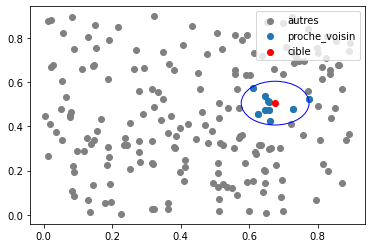

In [31]:
import numpy as np
import random as rd
from math import sqrt
import matplotlib.pyplot as plt

# retourne la distance maximale avec x dans la liste 
def maxDistance(list,x):
    maxD=distance(list[0],x)
    for elem in list:
        if distance(elem,x)> maxD:
            maxD=distance(elem,x)
    return maxD
# cette fonction permet de retourner l'indice d'element qui a la distance maximale avec x

def get_index_max_dis_L(list,x):
    max_j=0
    for j in range(len(list)):
        if distance(list[j],x)> distance(list[max_j],x):
            max_j=j
    return max_j

def distance (a, b):
    """Distance euclidienne entre deux points (espace à deux dimensions)

    Un point est représenté par un couple de valeurs flottantes.
    
    """    
    distance = sqrt( (b[0]-a[0])**2 + (b[1]-a[1])**2 )
    return distance


#def affiche(x, a, n , k_voisins ):
    """Affichage en deux dimensions : d'un point x, et d'un nuage de points à partir d'une liste a de n points.

    Un point est représenté par un couple de valeurs flottantes.
    x et ses voisins sont en bleu, les autres points sont en gris.
    Exemple d'utilisation de la librairie matplotlib.
    
    """
def affiche(x,a,proche_v,n):
    
    # Création des deux tableaux (axe x et y) pour affichage des points de a (tableaux numpy)
    a=np.array(a)
    X,Y=zip(*a)
    # Création des deux tableaux (axe x et y) pour affichage des points de k_voisins (tableaux numpy)
    proche_v=np.array(proche_v)
    Xk,Yk=zip(*proche_v)
    
    # Initialisation des propriétés de l'affichage
    ...
    
# Affichage

    fig,ax = plt.subplots()
    plt.scatter(X,Y,label = "autres",c="grey")
    plt.scatter(Xk,Yk, label = "proche_voisin")
    plt.scatter(x[0],x[1],label = "cible",c="red")
    plt.legend(loc="upper right")
    #calcul du diametre du cercle en fonction de la plus grande distance de X
    maxD=maxDistance(proche_v,x)   
# Ajout d'un cercle (ou d'une ellipse)
    ax.add_artist(plt.Circle(x, maxD, edgecolor='b', facecolor='none'))#Circle(centre, rayon): Circle((6, 15), 4)
    plt.show()
    
    ...
    
def cherche_k_voisins(k, x, a, n):
    """Recherche des k plus proches voisins d'un point x, dans une collection a de n éléments.

    a est une liste.
    n et k sont des entiers tels que : 1 <= k < n.
    On considère que chaque élément représente un point d'un espace euclidien à deux dimensions.
    Un point est représenté par un couple de valeurs flottantes.

    """
    proches_voisins = [] #initialisation de la liste
    # pour i allant de 1 à k
    for i in range(k):
    # mettre le point A[i] dans proches_voisins
        proches_voisins.append(a[i])
    # pour i allant de k+1 à n
    for i in range(k,n):
#     si la distance entre A[i] et x est inférieure à la distance d'un des points de proches_voisins à x

            if distance(a[i],x) < maxDistance(proches_voisins,x) and a[i] not in proches_voisins:
                jm=get_index_max_dis_L(proches_voisins,x)
                del proches_voisins[jm]
                proches_voisins.append(a[i])
    return  proches_voisins 

    
#la generation des valeurs de a et x aleatoirement
n=200
a = [(rd.uniform(0,0.9), rd.uniform(0,0.9)) for i in range(n)]
x =(rd.uniform(0,0.9), rd.uniform(0,0.9))
k = 10
#appel des methodes chercher_k_voisins et affichafe
if k < n:
    proche_v = cherche_k_voisins(k, x, a, n)
    affiche(x,a,proche_v,n)
else:
    print("k doit etre inferieur à n")